<a href="https://colab.research.google.com/github/j-river1/AEPS_Sigatoka/blob/master/PRACTICA_DEEPLEARNING_V_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · Práctica</p>
<p style="margin: 0; text-align:right;">2019-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Sistema automático para la detección de COVID-19 en radiografías

Una de las aplicaciones de AI es el procesamiendo de imágenes médicas. En particular, el uso de radiografías para una detección no invasiva y rápida del Covid-19 puede resultar extremadamente útil para ayudar y agilizar la tarea del personal médico [1][2].

En este proyecto desarrollaremos un detector *Deep Learning* de Covid-19 en radiografías. Para ello, utilizaremos las imágeners de la base de datos "Covid-chestxray-dataset" [3], generada por unos investigadores del grupo de investigación [Mila](https://mila.quebec/en/) y de la Universidad de Montreal [4]. También utilizaremos imágenes de radiografías de pacientes sanos y con neumonía bacterial extraídas de la competición de Kaggle "Chest X-Ray Images (Pneumonia)" [5].

En total, disponemos de una cantidad de 426 imágenes, divididas en conjuntos de entrenamiento (339 imágenes), validación (42 imágenes) y test (45 imágenes).

Las particiones se dan en listas ".txt", en las que a cada imagen se le asigna una etiqueta:
- 0) Healthy
- 1) Covid-19
- 2) Pneumonia

El objetivo consisten en desarrollar un sistema basado en redes neuronales capaz de clasificar correctamente las imágenes en estas 3 categorías.

**<u>Nota</u>**: Los resultados obtenidos por los modelos entrenados en esta base de datos son puramente para finalidades educativas y no se pueden utilizar para un diagnóstico real sin validación clínica.

#### Referencias
1. María Climent, 2020 [Covid-19: La Inteligencia Artificial De La Española Quibim Puede Acelerar El Diagnóstico Del Coronavirus](https://innovadores.larazon.es/es/esta-inteligencia-artificial-espanola-puede-acelerar-el-diagnostico-del-coronavirus/)
2. Angel Alberich-bayarri,2020 [Imagin, AI and Radiomix to understand and fight Coronavirus Covid-19](https://quibim.com/2020/02/14/imaging-ai-and-radiomics-to-understand-and-fight-coronavirus-covid-19/)
3. [Ieee8023/covid-chestxray-dataset](https://github.com/ieee8023/covid-chestxray-dataset)
4. Cohen, J.P., Morrison, P. and Dao, L., 2020. [COVID-19 image data collection](https://arxiv.org/pdf/2003.11597.pdf).
5. Paul Mooney, 2019 [Chest X-ray Images (pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)


#### Lecturas recomendadas
6. Souradip Chakraborty, 2020. [Detection Of Covid-19 Presence from Chest X-ray Scans Using Cnn & Class Activation Maps](https://towardsdatascience.com/detection-of-covid-19-presence-from-chest-x-ray-scans-using-cnn-class-activation-maps-c1ab0d7c294b)

7. Cohen, J.P., Hashir, M., Brooks, R. and Bertrand, H., 2020. [On the limits of cross-domain generalization in automated X-ray prediction](https://arxiv.org/pdf/2002.02497.pdf)

8. Karim, M., Döhmen, T., Rebholz-Schuhmann, D., Decker, S., Cochez, M. and Beyan, O., 2020. [Deepcovidexplainer: Explainable covid-19 predictions based on chest x-ray images](https://arxiv.org/pdf/2004.04582.pdf).

9. Wang, L., Wong, A. (2020). [COVID-Net: A Tailored Deep Convolutional Neural Network Design for Detection of COVID-19 Cases from Chest Radiography Images](https://arxiv.org/abs/2003.09871)

10. Zhou, B., Khosla, A., Lapedriza, A., Oliva, A. and Torralba, A., 2016. [Learning deep features for discriminative localization](https://arxiv.org/pdf/1512.04150.pdf). In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2921-2929).

11. Mordvintsev, A., Olah, C. and Tyka, M., 2015. [Inceptionism: Going deeper into neural networks](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html).

# Preparación del Dataset (3 puntos)

En este primer apartado se analizarán las imágenes de la base de datos y se disñará un *pipeline* para cargar las imágenes y prepararlas para la red neuronal.

Se deberán tener en cuenta factores como:
- Tamaño de entrada de las imágenes
- Normalización de las imágenes
- Visualizaciones de algunas muestras de cada categoría
- Técnicas de *data augmentation* para aumentar el tamaño del conjunto de entrenamiento

Y, en general, cualquier técnica que consideréis que pueda mejorar la implementación y resultados de este proyecto.

## Solución

Esta solución esta basada en las librerias creadas en **Keras** [1] para el tratamiento de las imagenes.


1. **Preprocesamiento**

Para la lectura de las imagenes se utilizó la función **image_dataset_from_directory** por lo tanto se crearon  las carpetas para guardar las imagenes.  Las estructura de estas carpetas se muestra en la figura [2]. Este diseño esta compuesto por tres carpetas: training, testing y validation, y para cada una de estas carpetas tiene tres subcarpetas para cada uno de los tipo de imagenes COVID-19, NEUNOMIA y HEALTHY. Esta clasificación tomó la codificacion suministrada en los archivos dados para la practica testing.txt, training.txt y validation.txt.



----------------------------------------------

/Main Directory/trainig

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

......................../trainig

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

......................../validation

....................................../COVID19  

....................................../NEUNOMIA

....................................../HEALTHY 

------------------------------------------------------------------
**figura [2]**










A continuación se crea la conexión con la base de datos donde están las imagenes.

In [4]:
# Conexion con las carpetas que contiene las imagenes.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


2. **Tamaño de las imagenes** 

Las imagenes tienen diferentes tamaños para  las tres categorias  y por lo tanto se fijo el tamaño estándar  de 224 x 224, que es el más utilizado para CNN. 

3. **Normalización de las imágenes**

Para la normalización de las imágenes se utilizó la clase de **ImageDataGenerator** de Keras y también para las tecnicas *data augmentation*.

Esta clase se tiene tres opciones para *pixel scaling* [2]:

1. *Pixel Normalization*. Convierte la escala de pixeles en un rango de 0 a 1. 
2. *Pixel Centering*. Convierte la escala de pixeles en un rango donde el valor medio es 0.
3. *Pixel Standarization*. Convierte la escala de pixeles en un rango donde el valor medio es igual a cero y con varianza igual a 1.

Como se menciona en [3], lo más recomendable para la normalización de los datos en *deep learning* es convertirlas a un rango de 0 a 1. Por lo tanto, las imagenes se convierte con *Pixel Normalization* fijando el parametro ***rescale*** igual a 1./255.

4. **Visualizaciones de algunas muestras de cada categoría**

A continuación se presenta algunas las imagenes por cada categoria.

4.1 **COVID-19**

Las siguientes radiografias corresponden a pulmones infectados con COVID19, estas presentan pequeñas manchas blancas, probablemente se debe a la reducción de la capacidad de intercambio de gases ya que los alveolos son llenados con fluidos altos proteinas cuando son atacados por el SARS-CoV-2 [5]. 

Además, estas imagenes tienen un color blanco más intenso en todo el torso que no permiten ver otros organos, como es el corazón. De acuerdo a [3], la parte derecha inferior son las partes más importantes para la deteccion del COVID-19 en las imagenes en los pulmones.

Using TensorFlow backend.


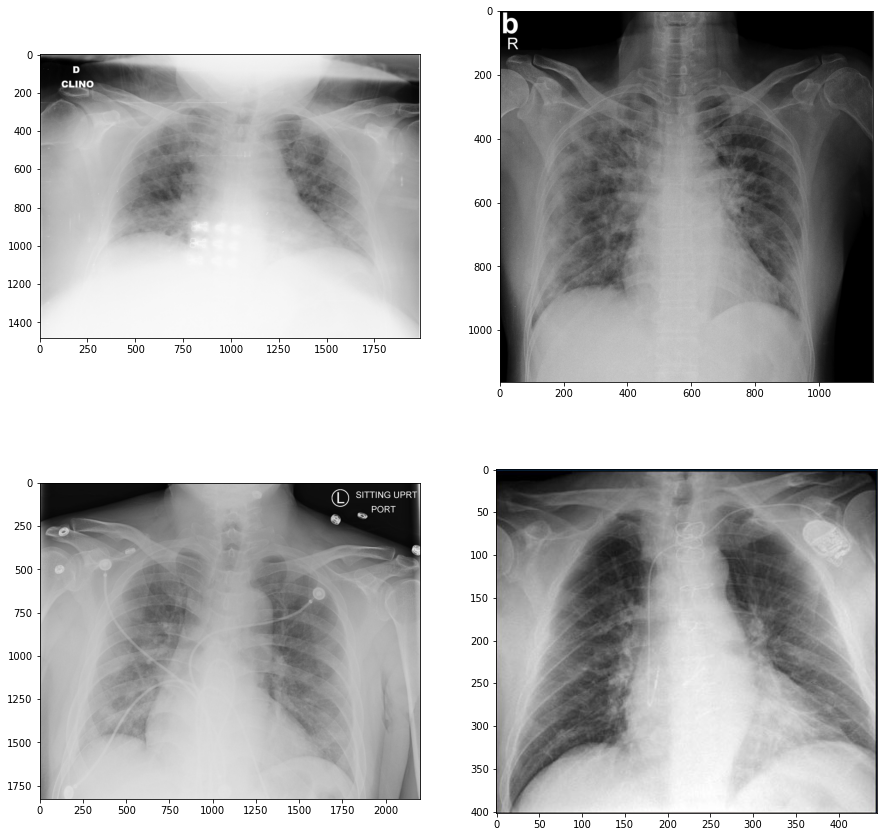

In [0]:
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, image, img_to_array, load_img

import matplotlib.pyplot as plt
import numpy as np


img_COV1 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
img_COV2 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg')
img_COV3 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/16654_2_1.jpg')
img_COV4 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_COVID-19/AR-2.jpg')


plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_COV1)
plt.subplot(222)
plt.imshow(img_COV2)
plt.subplot(223)
plt.imshow(img_COV3)
plt.subplot(224)
plt.imshow(img_COV4)



4.2  **HEALTHY**

En las siguientes radiografias se muestran un ejemplo de pulmones saludables. En las radiografias están los pulmones en forma de ovalos, con un tamaño  similar a la caja toracica y con un negro intenso. Tambien se puede detercar los diagracmas (estos se encuentran en la parte inferior de las costillas). De las misma manera que los huesos de la parte superior como es la clavicula.

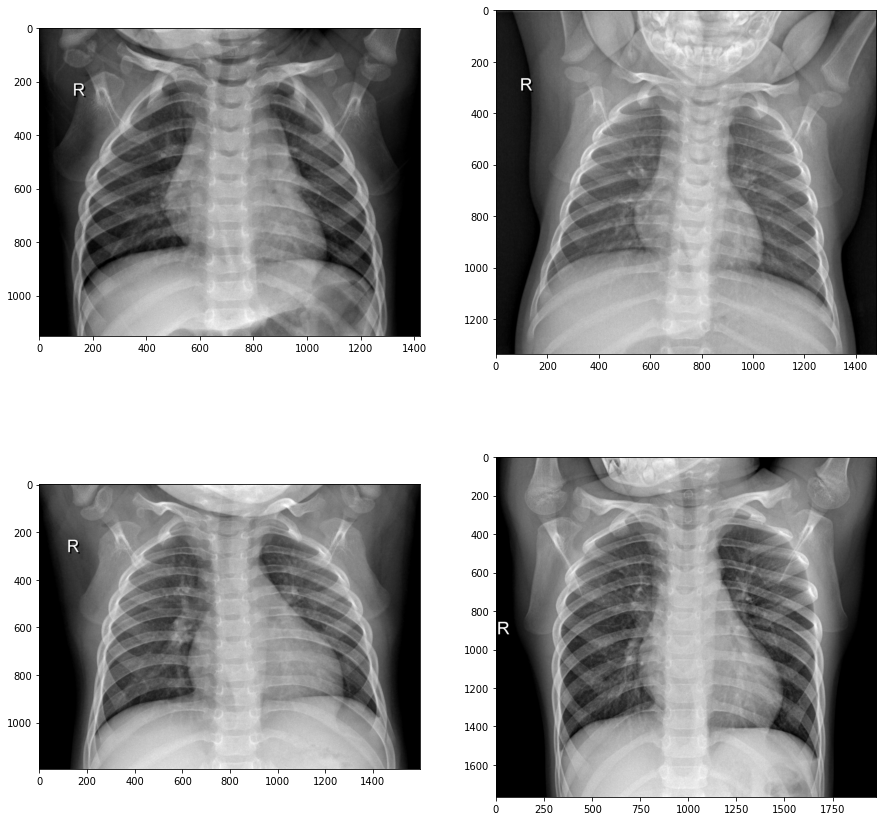

In [0]:
img_HE5 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0117-0001.jpeg')
img_HE6 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0423-0001.jpeg')
img_HE7 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/IM-0622-0001-0001.jpeg')
img_HE8 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/NORMAL2-IM-0408-0001.jpeg')



plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_HE5)
plt.subplot(222)
plt.imshow(img_HE6)
plt.subplot(223)
plt.imshow(img_HE7)
plt.subplot(224)
plt.imshow(img_HE8)

4.3 **PNEUMONIA**

En las siguientes imagenes de los pulmones con pneumonia se observa un color más intenso de blanco por todos los pulmones. Adicionalmente, se percibe una aumento del tamaño de los pulmones ya que los alveolos son llenados con pus o con fluidos altos en proteinas, que ocasiona dificultad para respirar [8].


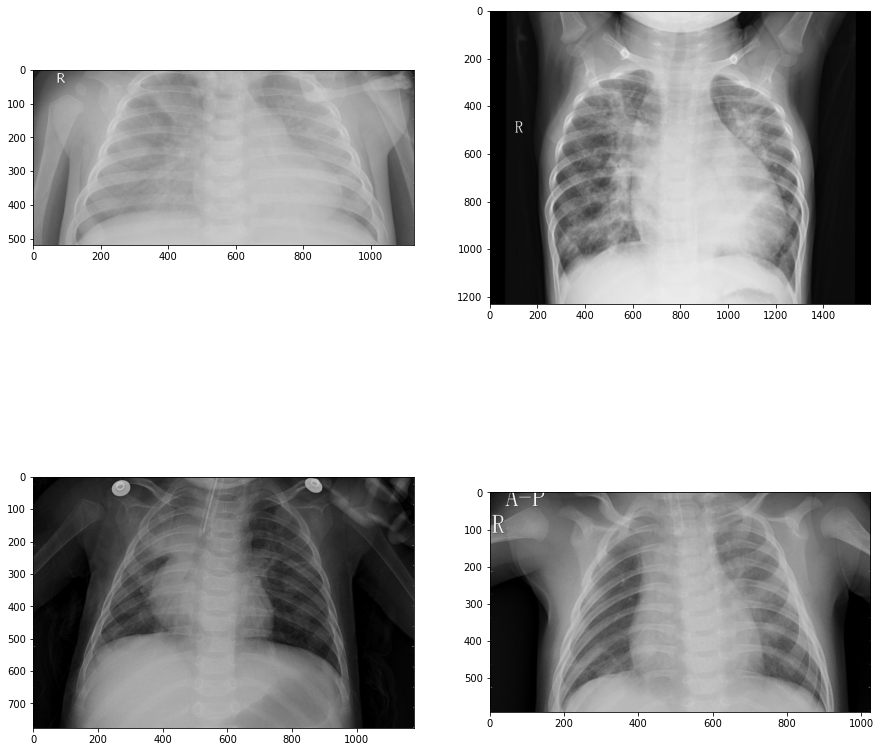

In [0]:
img_Neu9 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1011_bacteria_2942.jpeg')
img_Neu10 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1135_bacteria_3077.jpeg')
img_Neu11 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1502_bacteria_3928.jpeg')
img_Neu12 = load_img('/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1581_bacteria_4135.jpeg')


plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img_Neu9)
plt.subplot(222)
plt.imshow(img_Neu10)
plt.subplot(223)
plt.imshow(img_Neu11)
plt.subplot(224)
plt.imshow(img_Neu12)

4.4 **Comparación entre HEALTHY, COVID19 y PNEUMONIA**

En las siguientes imagenes están las imagenes de la tres categorias. En las figuras se puede observar que los pulmones que son HEALTHY son muy diferentes a los COVID19 y PNEUMONIA pero los PNEUMONIA y COVID son muy similares. Por lo tanto se puede preveer que la detección de COVID19 y PNEUMONIA será una tarea dificil para el modelo. 

Text(0.5, 1.0, 'COVID-19 Ejemplo 3')

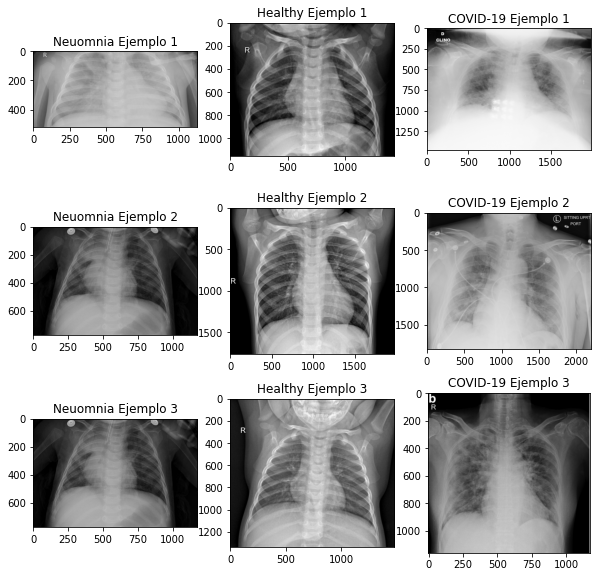

In [0]:
plt.figure(figsize=(10, 10))

plt.subplot(331)
plt.imshow(img_Neu9)
plt.title('Neuomnia Ejemplo 1')

plt.subplot(332)
plt.imshow(img_HE5)
plt.title('Healthy Ejemplo 1')

plt.subplot(333)
plt.imshow(img_COV1)
plt.title('COVID-19 Ejemplo 1')


plt.subplot(334)
plt.imshow(img_Neu11)
plt.title('Neuomnia Ejemplo 2')


plt.subplot(335)
plt.imshow(img_HE8)
plt.title('Healthy Ejemplo 2')

plt.subplot(336)
plt.imshow(img_COV3)
plt.title('COVID-19 Ejemplo 2')

plt.subplot(337)
plt.imshow(img_Neu11)
plt.title('Neuomnia Ejemplo 3')


plt.subplot(338)
plt.imshow(img_HE6)
plt.title('Healthy Ejemplo 3')

plt.subplot(339)
plt.imshow(img_COV2)
plt.title('COVID-19 Ejemplo 3')




5. **Técnicas de data augmentation**

Las técnicas de *data augmentation* tiene como objetivo crear nuevas imagenes a partir de las actuales mediante transformaciones. Estas técnicas son utilizadas cuando la cantida de datos es pequeña [9]. Además puede evitar el sobreentrenmiento del modelo, sin embargo no es suficente pues la imagenes sigue estan altamente relacionadas. Es importante destacar que el desempeño de los modelos de deep learning depende de la cantidad de datos. 

Como lo mencioné **Keras** permite aplicar esta tecnicas mediante la función **ImageDataGenerator**, entre las transformaciones que permite esta función están  desplazamientos *shifts*, rotaciones *flips*, acercamientos *zooms*.

Estas técnicas son usualmente aplicadas en los conjuntos *training* y no al conjunto de *validation* ni *test*. 

Los parametros que se modifican para esta practica son:

1. shift mendiante el parametro **width_shift_range** and **height_shift_range**
2. flips mendiante el parametro **horizontal_flip** y **vertical_flip**.
3. rotations mendiante el parametro **rotation_range**.
4. brightness mendiante el parametro  **brightness_range**.
5. zoom mendiante el parametro **zoom_range**.

A continuación se explica como funciona para cada uno de los siguientes parametros:


5.1 **Horizontal shift augmentation**

Este es un  desplazamiento de las imagenes de forma horizontal, manteniendo las dimensiones de la imagen iguales. Esto ocasiona que se genere nuevos pixeles en los lugares donde está vacia la imagen, y se creen un difumación de la imagen.

Los parametros para ajustar en este caso es *width_shift_range* donde se debe especificar un rango. En este caso se puede definir un rango de acuerdo al tamaño de la imagen.

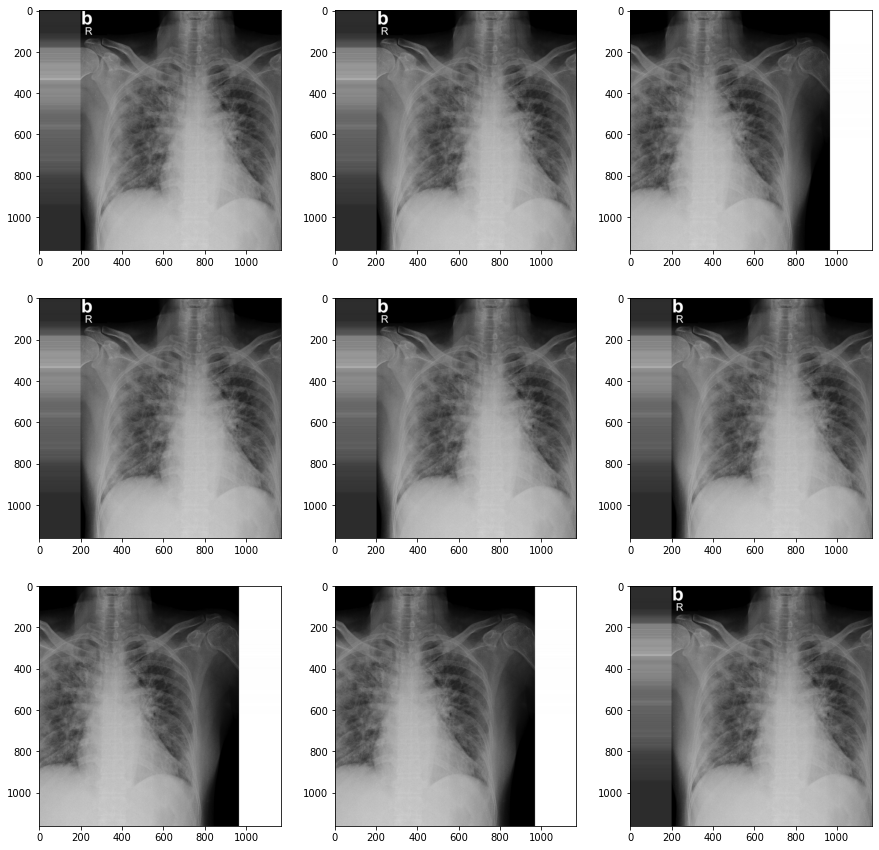

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from matplotlib import pyplot


data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.2 **Vertical shift augmentation**

Este es desplazamiento de la imagen hacia arriba o hacia abajo. De la misma manera que el desplazamiento horizontal, en los lugares que están vacios se crean nuevos pixeles de tal manera que la imagen queda esos lugares difumadas.

Los parametros para ajustar en este caso  *height_shift_range* donde se debe especiifcar el rango o la proporción que se debe dezplazar.

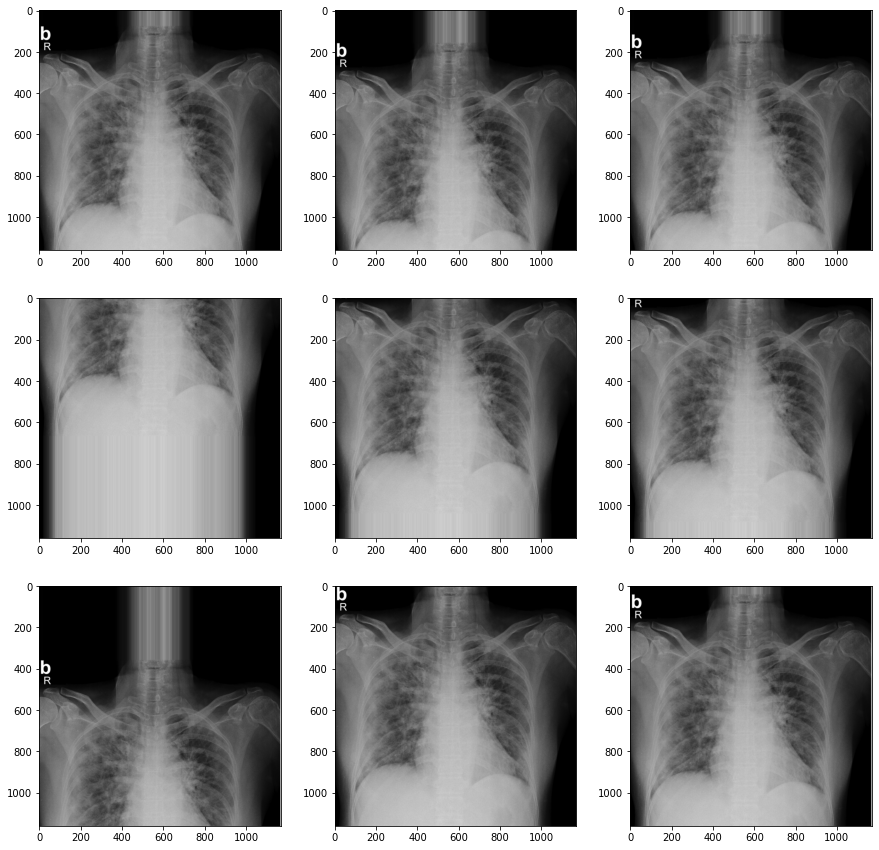

In [0]:

data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.3 **Horizontal Flip Augmentation**

Esta tecnica se basa en invertir las filas o columnas de pixeles en el caso de un vertical u horizontal. 

Para el caso de las imagenes de la radiografias no tendria sentido una cambio de posición vertical ya que las lecturas las imagenes siempre tiene la misma dirección, la cabeza arriba.

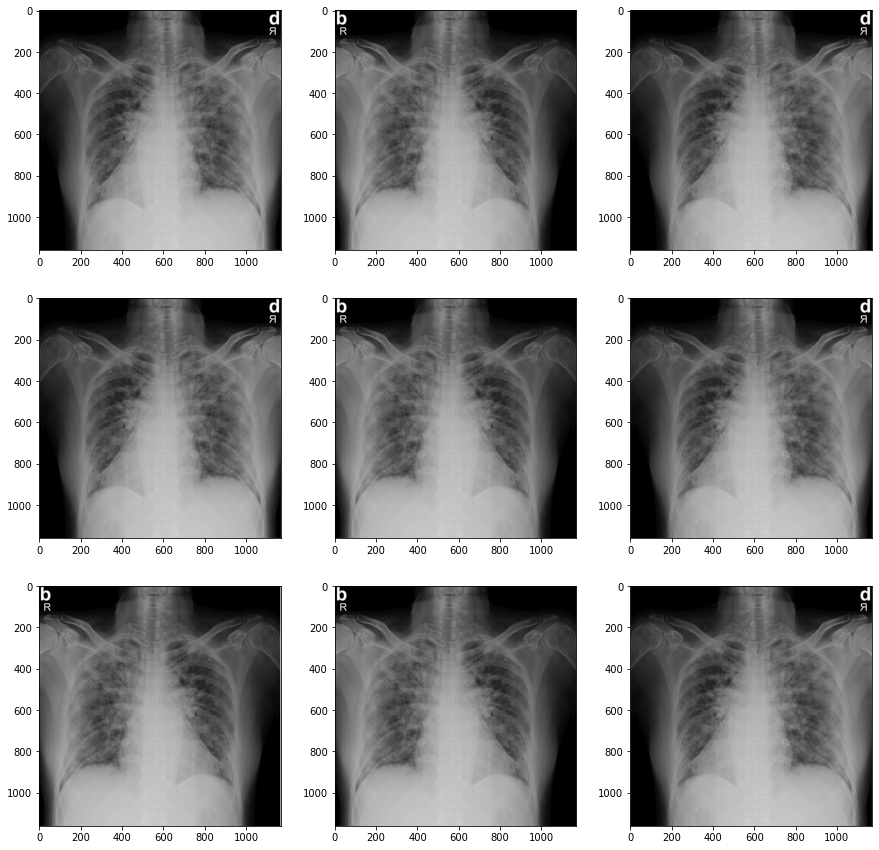

In [0]:

# convert to numpy array
data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.4 **Random Rotation Augmentation**

Estes es un aumento de rotación gira aleatoriamente la imagen ene el sentidos de las agujas del reloj en un determinado de grados de 0 a 360 [10]. En algunos casos las rotaciones generará espacios en blanco.

Esta es una de las translaciones más importantes para el COVID 19 porque es frecuente que las imagenes de radioagrafia tiende a tener problemas de alineación, no son derechas.

El parametro para ajustar es *rotation_range* en donde se debe fijar el rango. En este caso es 90 grados. No tiene sentido tener rotaciones mayores pues la imagenes tiene un sentido, la cabeza siempre está arriba.


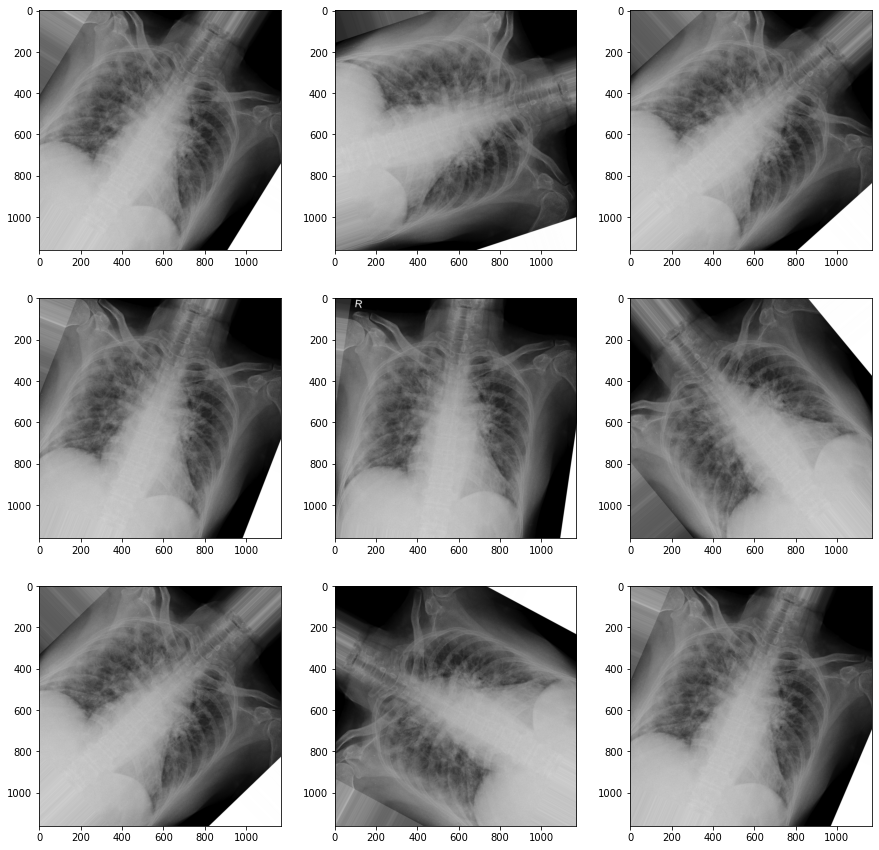

In [0]:

# convert to numpy array
data = img_to_array(img_COV2)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.5 **Random Brightness Augmentation**

Esta tecnica se basa en el brillo de la imagen, que se puede oscurecer o iluminar o ambas. La idea es permitir que un modelo generalice a traves de diferentes niveles de iluminación. 

De la misma manera que las anteriores tecnicas, es importante para este modelo pues reproduce problemas habituales de las imagenes debido a la calidad de las equipos para la toma de rayos X. 


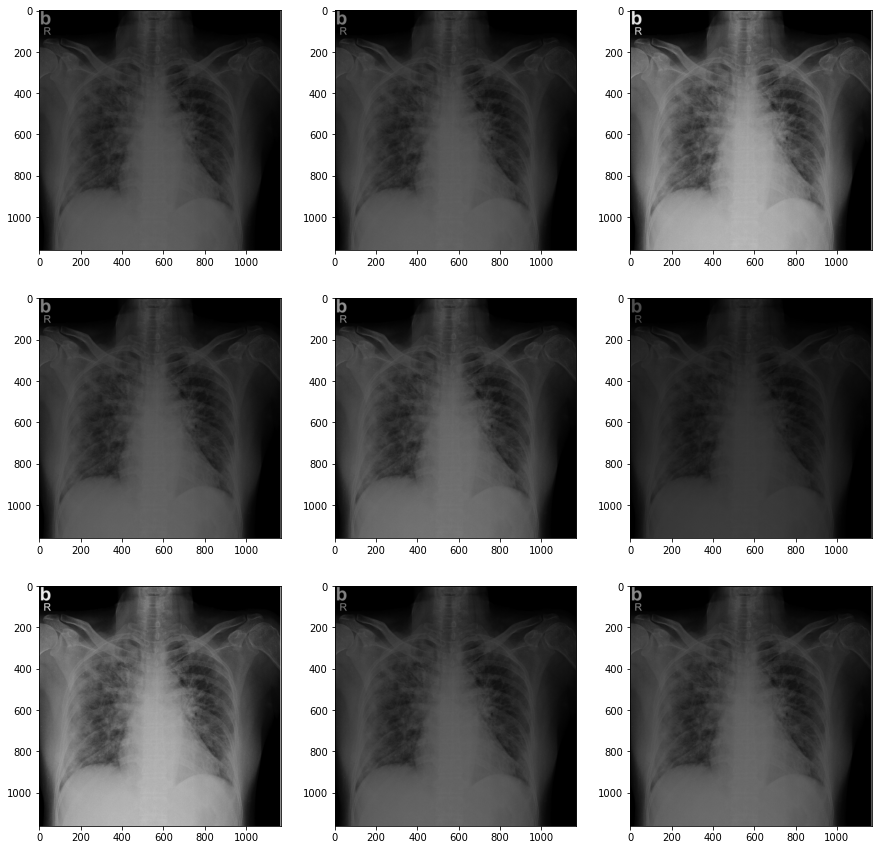

In [0]:

data = img_to_array(img_COV2)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

5.6 **Random Zoom Augmentation**

Esta tecnica amplia aleatoriamente la imagen y agrega nuevos valores de pixeles de alrededor de la imagen o interpola valores de píxeles respectivamente. Se especifica un valor tal manera que [1-valor, 1 + valor], luego si el valor es 0.3 entonces el rango es [0.7, 1.3]. Con este tecnica se puede diferenciar aspectos unicos en los pulmones que permiten diferenciarlos de los tres grupos.


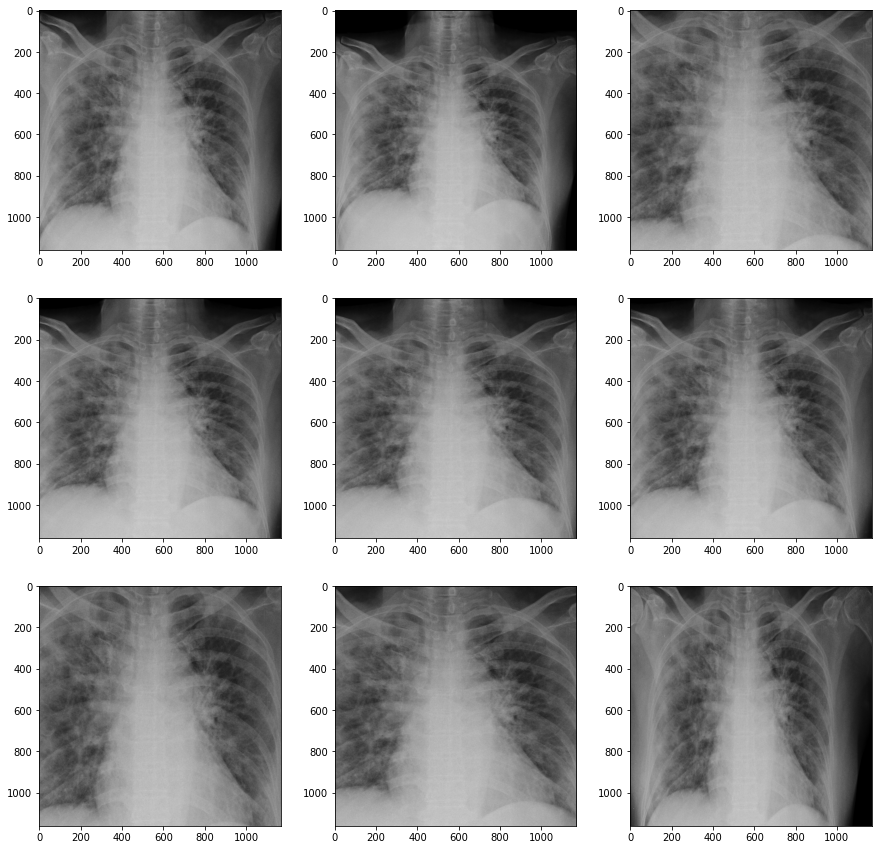

In [0]:

data = img_to_array(img_COV2)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
it = datagen.flow(samples, batch_size=1)

f = plt.figure(figsize=(15,15))
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
pyplot.show()

# Creación del modelo y métricas de evaluación (3 puntos)

En esta sección se tiene que desarrollar el *pipeline* para la creación y entrenamiento de el/los modelo/s.

Se trabajará con los datos de *training* y de *validación*.

Se deberán tener en cuenta aspectos como:
- El tipo de arquitectura más adecuado para el problema
- Las métricas que se deben utilizar para medir de forma correcta el comportamiento del modelo
- Visualizaciones de las curvas de entrenamiento/validación que ayuden a decidir cuál ha sido el mejor modelo.
- Considerar un modelo *baseline* para poder comparar las métricas (por ejemplo, utilizar predicciones aleatorias o utilizar un modelo muy sencillo, como por ejemplo una red con muy pocas capas)


## Solución

A continuación se presentará las soluciones para cada uno de los item anteriores:

- **El tipo de arquitectura más adecuado para el problema**

El tipo de redes neuronales más adecuada para este tipo de imagenes son la redes convolucionales porque estas redes extraen las caracteristicas más importantes de la imágenes de mediana y alta resolución como son las imagenes de los rayos X, (Boschue, [13]). 

En medio de la pandemia se han comenzado a implementar herramientas de diferentes areas para ayudar a salir de esta crisis. En este caso, se han hecho varios aplicaciones de modelos de deep learning para la deteccion del COVID -19. Por ejemplo, en los articulos DeepCOVIDExplainer: Explainable COVID-19 Predictions
Based on Chest X-ray Images (Karim, [11]) y On the limits of cross-domain
generalization in automated X-ray prediction (Cohen, [12]) muestran que los modelos VGG y Resnet tiene los desempeños más altos. 





- **Las métricas que se deben utilizar para medir de forma correcta el comportamiento del modelo**

Los métricas que se utilizará para medir el desempeño de los modelos presentados en esta practica son exactitud de clasificación (*classifiction accurancy*) que es la razon entre el número de correcta predicciones y el total de muestras.  Y la confusión matrix, que es una matriz que describe en detalle el desempeño de la matriz.

- **Considerar un modelo baseline para poder comparar las métricas (por ejemplo, utilizar predicciones aleatorias o utilizar un modelo muy sencillo, como por ejemplo una red con muy pocas capas)**

El modelo que utilice como  **baseline** es un modelo tipo convnet, CNN convolutional neural network (la arquitectura  del modelo se encuentra abajo). Por otro lado, también se implementó el modelo VGG16  ya que tiene un buen desempeño para la clasificación de imagenes de rayos X (Md. Rezaul Karim, [1]).

Se aplicaron dos parametrizaciones de data augmentation. Una con los siguientes parametros:

- rescale=1./255
- zoom_range=[0.5,1.0],
- brightness_range=[0.2,1.0],
- rotation_range=90,
- height_shift_range=0.5,
- width_shift_range=[-224,224],
- horizontal_flip=True

Y la segunda parametrización con los siguientes parametros:


- rescale=1./255,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True

Estas dos paramterizaciones se aplicaron para el modelo base. 


La estrcutra del modelo base (convent) es:

---------------------------------------------------------------------------
- Capa de convolución de 32 con kernel 3x3.
- Capa de ReLu 
- Capa de Maxpooling kernel 2x2
------------------------------------------------------------------------------

- Capa de convolución de 32 con kernel 3x3.
- Capa de ReLu 
- Capa de Maxpooling kernel 2x2
-----------------------------------------------------------------------------

- Capa de convolución de 32 con kernel 3x3.
- Capa de ReLu 
- Capa de Maxpooling kernel 2x2
--------------------------------------------------------------------------------
- Capa Flatten
--------------------------------------------------------------------------------
- Capa Densa de 64 neuronas con activación ReLu
--------------------------------------------------------------------------------
- Capa Dropout con probabilidad de 0.5
--------------------------------------------------------------------------------
- Capa Densa de con tres neuronas neuronas activación softmax
-------------------------------------------------------------------------------- 
Como se puede observar en la estructura del modelo base, tiene estas secuencias (Conv->RElu->Maxpool) de capas que se repite. La estructura del **segundo modelo** tiene las mismas capas del modelo base más la dos secuencias de capas (Conv->RElu->Maxpool).

Como se observa en las graficas de accurancy para la  primera y segunda parametrización no muestra grandes diferencias en el accurancy de los modelos, ambos modelos están por debajo del 0.60 para toda las epocas. Esto sugiere que la parametrización de augmentation no está influyendo en el desempeño del modelo. Por lo tanto, fijaré la augmentation con la segunda parametrización para el segundo modelo y para el modelo VGG19. 

Además, se implemento la red neuronal VGG19 ya que su desempeño para la clasificación de imagenes de tipo rayos X tiene buenos resultados. 





tiene mejores resultados que la primera parametrización. El accurancy en la primera parametrización su maximo valor durante todas las epocas no alcanzo ni siquiera el 50% en ninguno de los dos modelos, en cambio para el segunda parametrización fue mayor mayor al 90% en varias epocas. Una razón para explicar este resultados es que las imagenes del conjunto *validation* no tienen imagenes oscuras, ni desplazadas, ni tampoco rotadas, por lo que el modelo esta aprendiendo de imagenes que no se van a utilizar. Sin embargo, si se escogen imagenes de pulmones de la vida cotidiana, es muy probable que las imagenes tenga todas las imprefrecciones que se menciona en esta parametrización.  





#**Modelo Base (Covnet) con la primera parametrización**


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = 384
nb_validation_samples = 42
epochs = 30
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# this is the augmentation configuration usada en el training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=[0.5,1.0],
        brightness_range=[0.2,1.0],
        rotation_range=90,
        height_shift_range=0.5,
        width_shift_range=[-224,224],
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/training',  # this is the target directory
        target_size=(224, 224),  
        batch_size=batch_size,
        class_mode='categorical'
        )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/testing',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(32, (3, 3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BaseLine_modelo = model.fit_generator(accura
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, verbose = 1)

Y_pred = BaseLine_modelo.predict_generator(validation_generator, nb_validation_samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'HEALTHY', 'PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
#modelVGG2.save("Modelo_Baseline_1.h5")


## **Matrix de confusion para el modelo baseline con la primera parametrización**

In [23]:
import numpy as np
nb_train_samples = 384
nb_validation_samples = 42
Y_pred = model.predict_generator(validation_generator, nb_validation_samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'HEALTHY', 'PNEUMONIA']

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



Classification Report
              precision    recall  f1-score   support

    COVID-19       0.40      0.67      0.50        15
     HEALTHY       0.33      0.07      0.11        15
   PNEUMONIA       0.35      0.40      0.38        15

    accuracy                           0.38        45
   macro avg       0.36      0.38      0.33        45
weighted avg       0.36      0.38      0.33        45



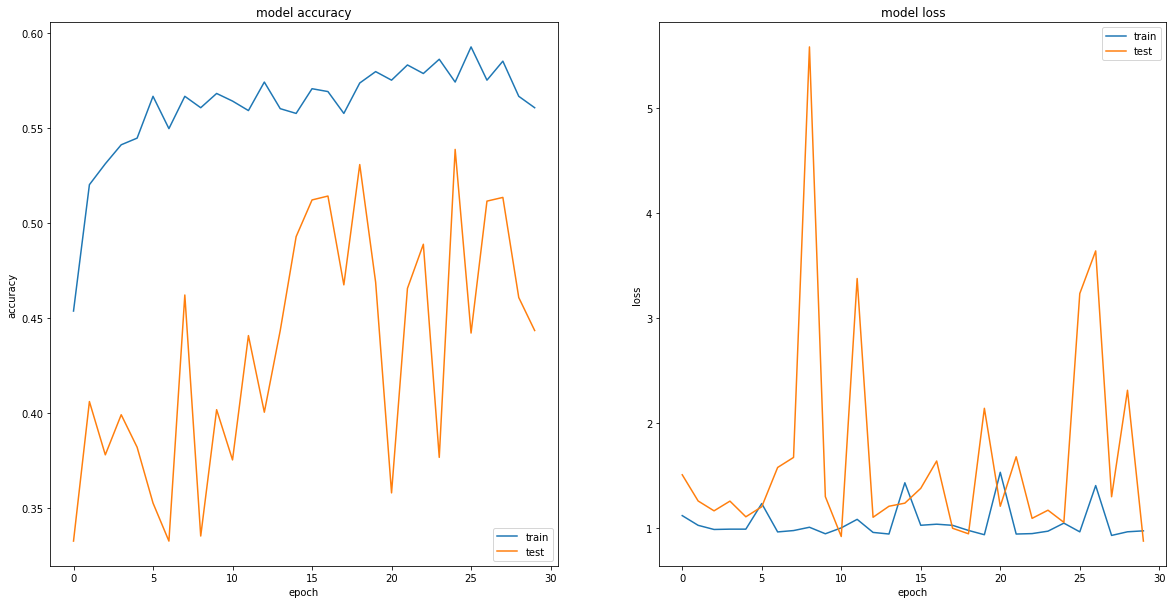

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(BaseLine_modelo.history['accuracy'])
plt.plot(BaseLine_modelo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


#plt.figure(figsize=(20, 10))
plt.subplot(1,2,2)
plt.plot(BaseLine_modelo.history['loss'])
plt.plot(BaseLine_modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()








#**Modelo Base (Covnet) con la segunda parametrización**



In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K



# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = 384
nb_validation_samples = 42
epochs = 30
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# this is the augmentation configuration usada en el training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/training',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical'
        )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/testing',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(32, (3, 3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BaseLine2_modelo = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, verbose = 1)



## **Matrix de confusion para el modelo baseline con la segunda parametrización**

In [37]:

Y_pred = model.predict_generator(validation_generator, nb_validation_samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'HEALTHY', 'PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[5 5 5]
 [2 8 5]
 [8 5 2]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.33      0.33      0.33        15
     HEALTHY       0.44      0.53      0.48        15
   PNEUMONIA       0.17      0.13      0.15        15

    accuracy                           0.33        45
   macro avg       0.31      0.33      0.32        45
weighted avg       0.31      0.33      0.32        45



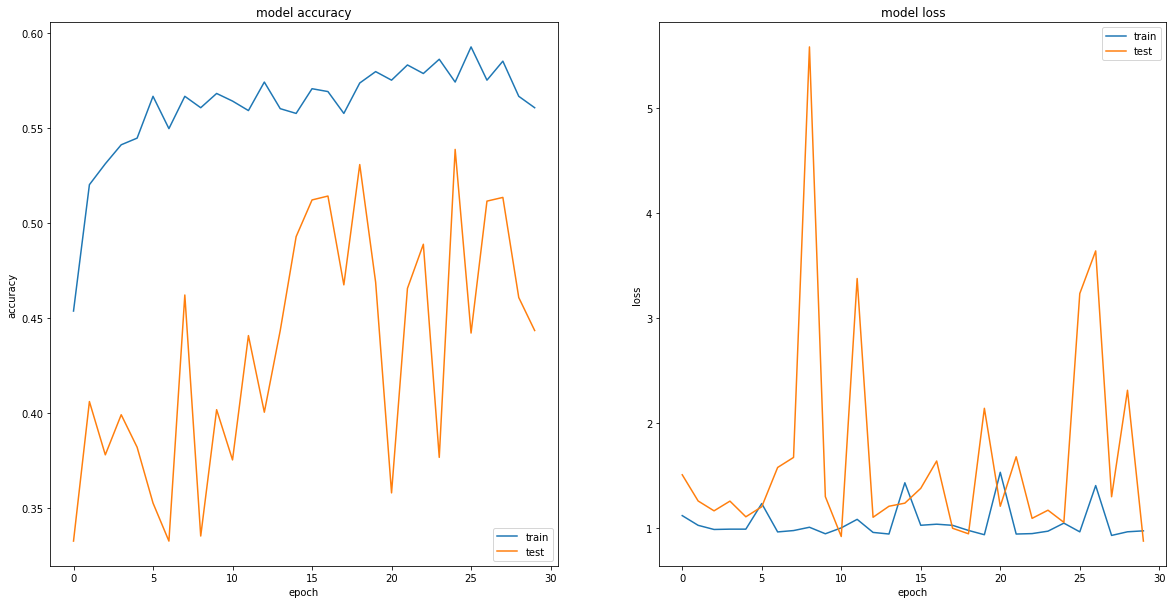

In [38]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(BaseLine_modelo.history['accuracy'])
plt.plot(BaseLine_modelo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(BaseLine_modelo.history['loss'])
plt.plot(BaseLine_modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()








#**Segundo modelo con la segunda parametrización**

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K



# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = 384
nb_validation_samples = 42
epochs = 30
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# this is the augmentation configuration usada en el training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/training',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical'
        )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/testing',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(32, (3, 3),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

BaseLine2_modelo = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, verbose = 1)

## **Matrix de confusion para el segundo modelo baseline con la segunda parametrización**

In [53]:

Y_pred = model.predict_generator(validation_generator, nb_validation_samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'HEALTHY', 'PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[6 5 4]
 [6 8 1]
 [3 6 6]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.40      0.40      0.40        15
     HEALTHY       0.42      0.53      0.47        15
   PNEUMONIA       0.55      0.40      0.46        15

    accuracy                           0.44        45
   macro avg       0.46      0.44      0.44        45
weighted avg       0.46      0.44      0.44        45



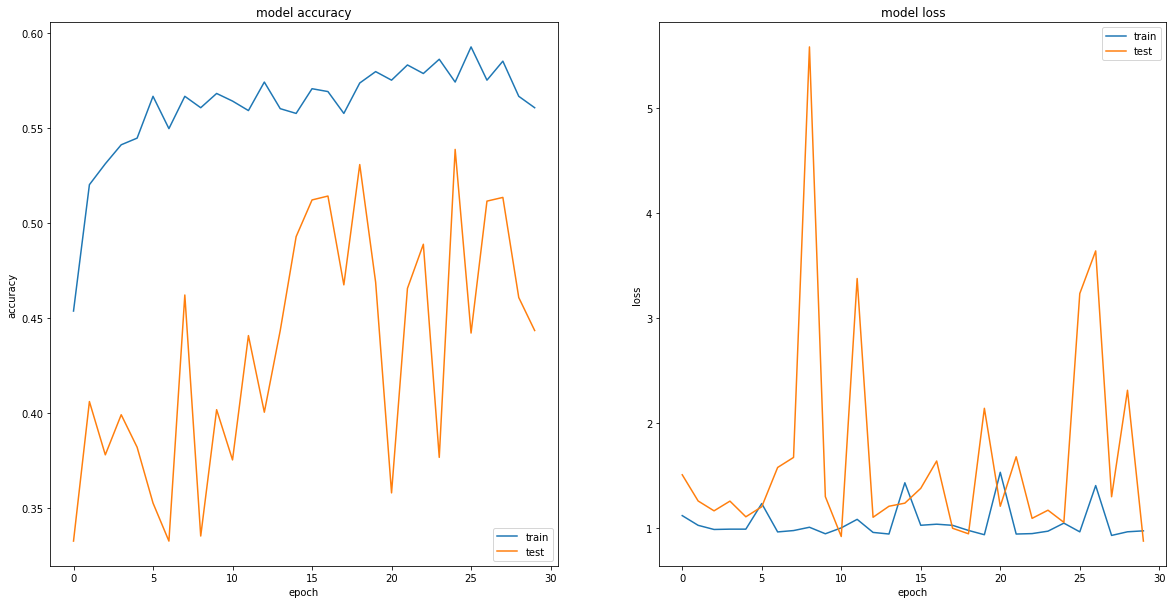

In [54]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(BaseLine_modelo.history['accuracy'])
plt.plot(BaseLine_modelo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(BaseLine_modelo.history['loss'])
plt.plot(BaseLine_modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



# Modelo **VGG19** 

In [39]:
from keras.applications import VGG19

# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = 384
nb_validation_samples = 42
epochs = 30
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


# this is the augmentation configuration usada en el training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/training',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical'
        )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/PRACTICA/Main Directorio/testing',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


pre_trained_model = VGG19(input_shape = (224, 224, 3), include_top= False, weights ='imagenet')
pre_trained_model.summary()



80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False


modeloVGG = Sequential ([pre_trained_model, Flatten(), Dense(256, activation = 'relu'),
                         Dense(3, activation ='softmax')])


In [43]:
modeloVGG.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 771       
Total params: 26,447,939
Trainable params: 6,423,555
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

modeloVGG.compile(loss ='categorical_crossentropy',    optimizer='rmsprop',metrics=['accuracy'])
historyVGG19 = modeloVGG.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = steps_per_epoch, epochs = epochs)

In [49]:

Y_pred = modeloVGG.predict_generator(validation_generator, nb_validation_samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['COVID-19', 'HEALTHY', 'PNEUMONIA']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[4 5 6]
 [6 4 5]
 [5 6 4]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.27      0.27      0.27        15
     HEALTHY       0.27      0.27      0.27        15
   PNEUMONIA       0.27      0.27      0.27        15

    accuracy                           0.27        45
   macro avg       0.27      0.27      0.27        45
weighted avg       0.27      0.27      0.27        45



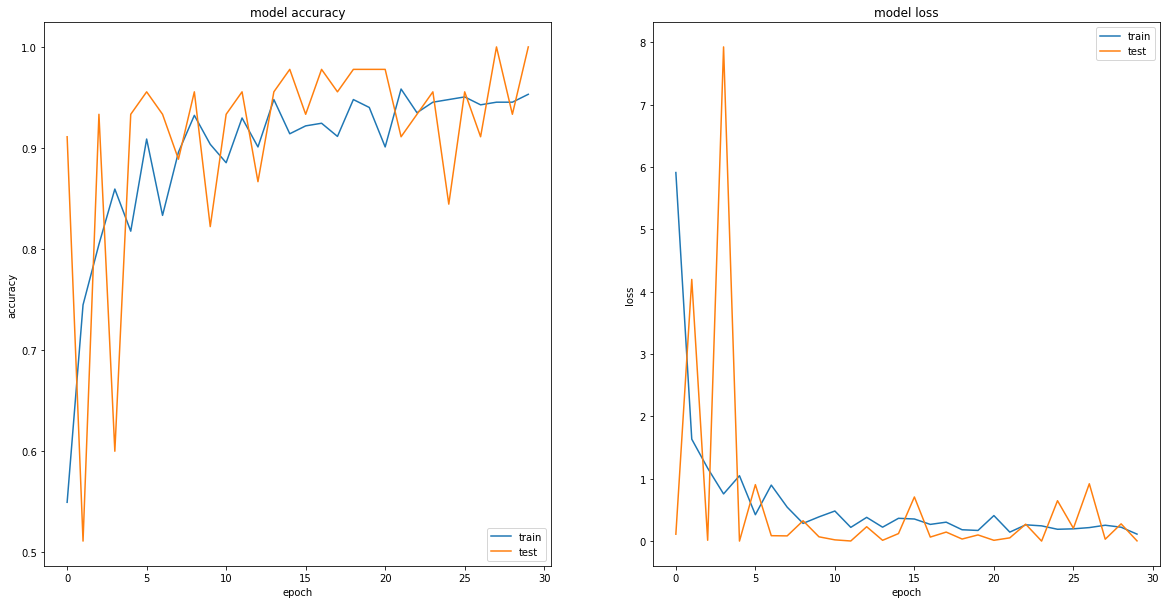

In [51]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.plot(historyVGG19.history['accuracy'])
plt.plot(historyVGG19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(historyVGG19.history['loss'])
plt.plot(historyVGG19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# Resultados y Conclusiones (3 puntos)

En esta sección se debe implementar la fase de test de los mejores modelos desarrollados anteriormente.

Se valorarán aspectos como:
- Razonamiento de qué arquitectura es la más adecuada
- Análisis cuantitativo y cualitativo de los resultados.

## Solución

La implementación de los conjuntos test se realizaron en el punto anterior para cada uno de los modelos implementados.

- Razonamiento de qué arquitectura es la más adecuada.

Antes de explicar cual es la mejor arquitectura, es importante mencionar que el tipo de redes neuronales que se necesitan para este caso son las redes neuronales convolucionales porque son capaces de manejar imagenes con resoluciones de mediana y alta resolución (Boschue, [14]). Además son capaces de reconocer los más abstactos detalles. También se ha mostrado que este tipo de redes han mostrado un buen desempeño para la detección de enfermedades por medio de los rayos X (Karim, [11]).

En esta PRAC se abordó tres tipos de arquitecturas diferentes, la primera es una red sencilla convolucional desarrollada en los 90's por Yann Lunn [15] para la clasificación de las imagenes y se les adicionó las capas ReLu. El desempeño de esto modelo durante todas las epoca fue menor a 60%.  Una razón para explicar este bajo desempeño es debido a la baja cantidad de capas, el modelo solo tiene tres capas, y dado que las primeras capas muestran las caracteristicas de más bajo nivel (Boschué, [14]) luego no detectará las caracteristicas más representativas que diferencias a los pulmones sanos, con neumonia o COVID19.  Por ejemplo una de las caracteristicas de los pulmones para decidir que tiene o no coronavirus son las pequeñas manchas en la parte izquierda de los pulmones (Karim, [11]), estas manchas son muy pequeñas y de dificil detectarlas. 

En el caso de accurancy, el mejor modelo fue VGG19, las iniciales VGG hacen referencia al grupo de investigación que los creó, Visual Geometry Group. Este modelo nacé en la competencia de ImagenNet Large Scale Visual Recognition Challenge (ILSVRC), el equipo que participo con este modelo ocupó el primera lugar, y  apartir de ahi se ha posesionado como uno de los mejores modelos para el reconocimiento de imagenes.  Este modelo tiene 19 capas convolucionales y tres capas totalmente conectadas y una capa de salida con la función de activación softmax. El tamaño de la imagen para utilizar este modelo es 224x244 de RGB, es decir la matrix de entrada tiene dimensiones (224, 224, 3). El modelo solo realiza un preprocesamiento de la imagen extrayendo el valor medio de cada pixel, calculado sobre todo el conjunto de  de entrenamiento [16]. Los kernels son de tamaño (3 x 3) con un stride de 1. Las capas maxpooling tienen un kernel de 2x2 con un stride de 2. Entre las aplicaciones que tiene el modelo es el reconocimiento de imagenes faciales. En Keras hay modelo VGG preentrenado con con las imágenes de ImagenNet, este modelo se utilizó en esta PRAC. El buen desempeño de este modelo se debe entre otras cosas a la cantidad de capas ocultas (Bosch, [14]).



- Análisis cuantitativo y cualitativo de los resultados.



Escoger el mejor modelo dependerá del objetivo que se quiere alcanzar, si con el modelo se pretende identificar los pacientes con COVID19 entonces se tendrá que buscar un modelo que no solo tenga un accurancy alto sino que además tenga  un recall alto para COVID19. Cabe destacar que como lo hemos visto en las practicas anteriores y en el curso, un alto accurancy no necesariamente implica un buen desempeño.


Con este modelo se probaron dos parametrizaciones diferentes para ImageDataGenerator, como se mencionó en el punto anterior. De acuerdo a estos resultados, el modelo baseline con la primera parametrizacion clasificó mejor a los pacientes con COVID-19 que con los pacientes saludables o con neumonia, el indicador **recall**, que es la proporción de positivos correctamente clasificados fue de 0.40. En cambio, el mismo modelo pero con la segunda paramerización el **recall** fue de 0.33.  Una razón para explicar esta diferencia es porque las imagenes del conjunto de validación no tiene imagenes con las transformaciones hechas.  

El segundo modelo tuvo un accuracy por debajo del 60% pero tuvo un buen desempeño en los **recall** para los tres imagenes, siendo la más alta para las imagenes saludables con 0.55 y  la más baja el COVID19 con 0.40.

Para el caso del modelo VGG19, el acuracy fue superior a 90% usando la segunda parametrización en todas las epocas mayores a 15. El **recall** para este modelo es 0.27 para los tres casos, saludable, neuominia y con COVID19. En otras palabras, el modelo está clasificando de la misma manera los tres tipos de imágenes. 
Es importante tener en cuenta que el modelo se fijo con un número de epocas igual a 30, que de acuerdo a las graficas no presenta sobreentrenamiento.  


# *Explainability* (1 punto)

Investiga sobre las técnicas que se utilizan para entender las decisiones de una CNN. Por ejemplo, los [Class Activation Maps](https://arxiv.org/pdf/1512.04150.pdf) (CAM)[4] son una modificación en la arquitectura de una CNN de clasificación de imágenes que permite visualizar qué partes de la imagen se consideran para la clasificación de una muestra con una determinada etiqueta. Variaciones de las CAMs se han aplicado recientemente para entender el comportamiento de las redes para detectar Covid-19 [8].

Otro método es el popular [Deep Dream](https://deepdreamgenerator.com/)[11]. Este método, a parte de generar imágenes con un estilo artístico/psicodélico, sirve para entender el tipo de características que busca una red en la imagen de entrada para clasificarla con una determinada etiqueta.

Implementa alguna técnica de visualización para intentar entender las decisiones de la CNN entrenada.

# **Solución**

Para la visualizacion de los datos CAM se toma como referencia  de https://keras.io/examples/vision/grad_cam/.

## Setup

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, image, img_to_array, load_img





## Configurable parameters

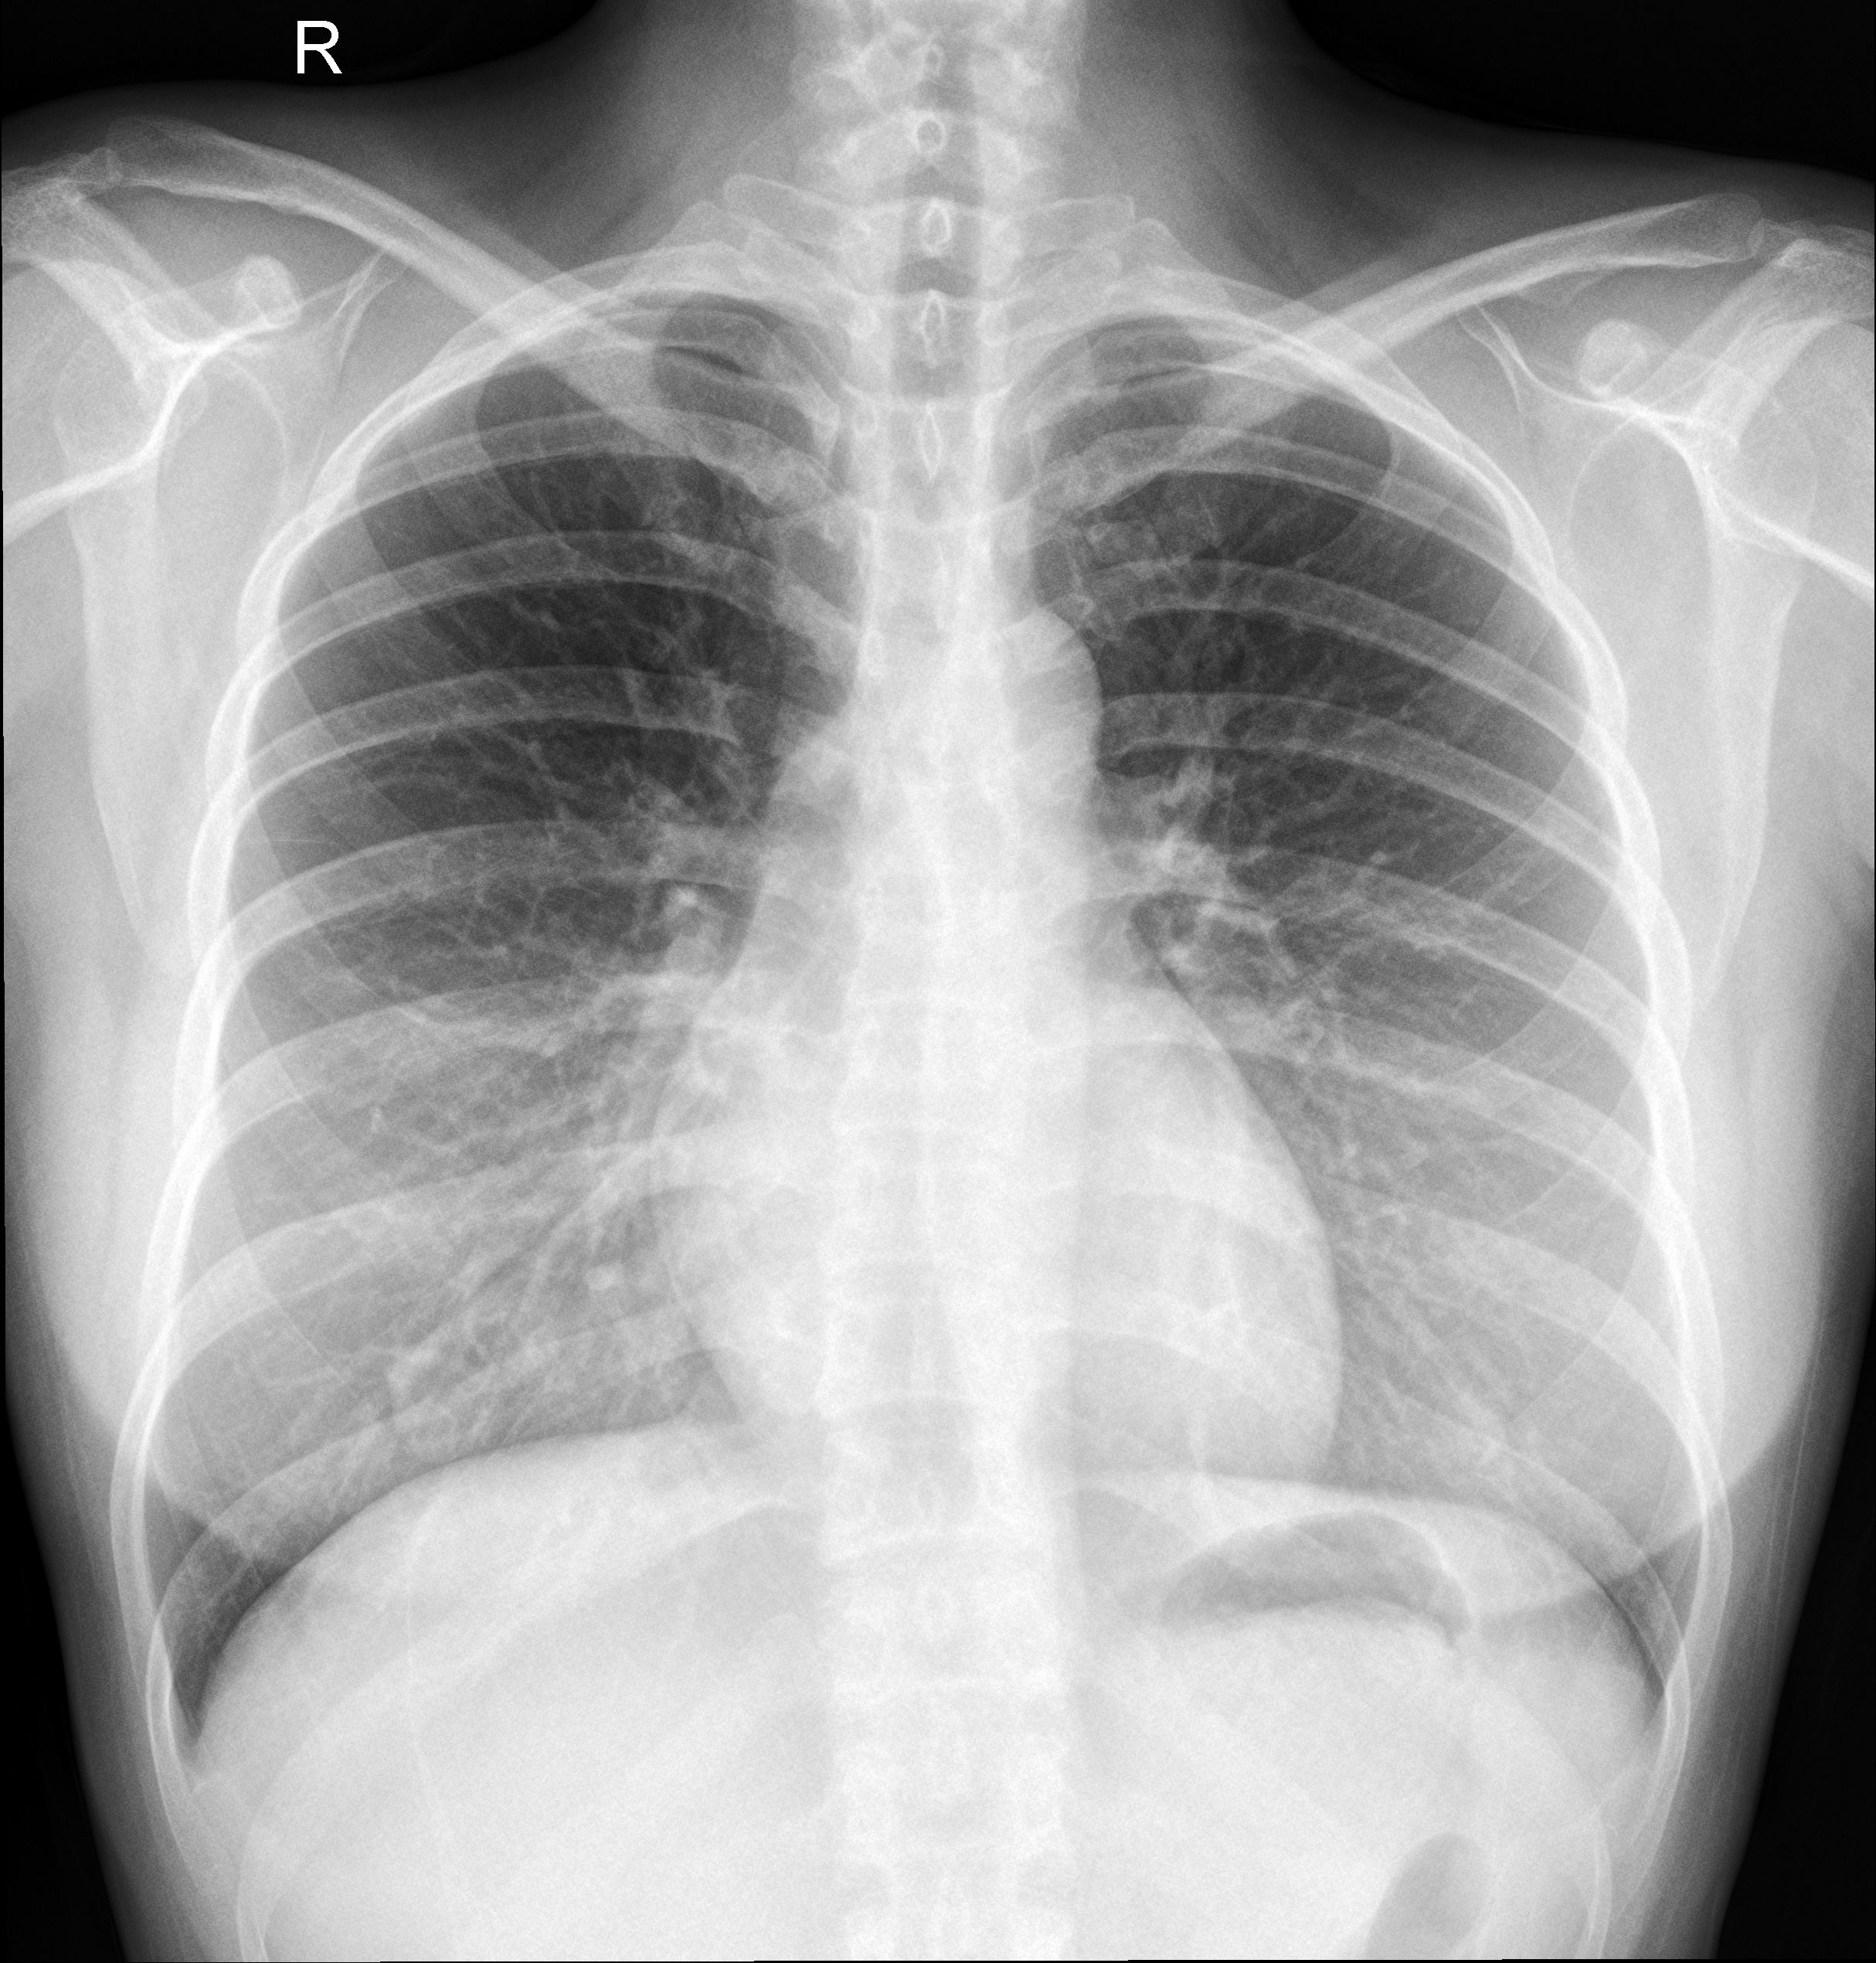

In [29]:
# Display

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

#NORMAL2-IM-0587-0001-0001

#img_path = '/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_PNEUMONIA/person1011_bacteria_2942.jpeg'
img_path = '/content/drive/My Drive/PRACTICA/Main Directorio/training/dataset_HEALTHY/NORMAL2-IM-0587-0001-0001.jpeg'

display(Image(img_path))

# The Grad-CAM algorithm

In [0]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

## Let's test-drive it

In [31]:
#import keras

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Predicted: [('n03388043', 'fountain', 0.15321463)]


ValueError: ignored

# Create a superimposed visualization

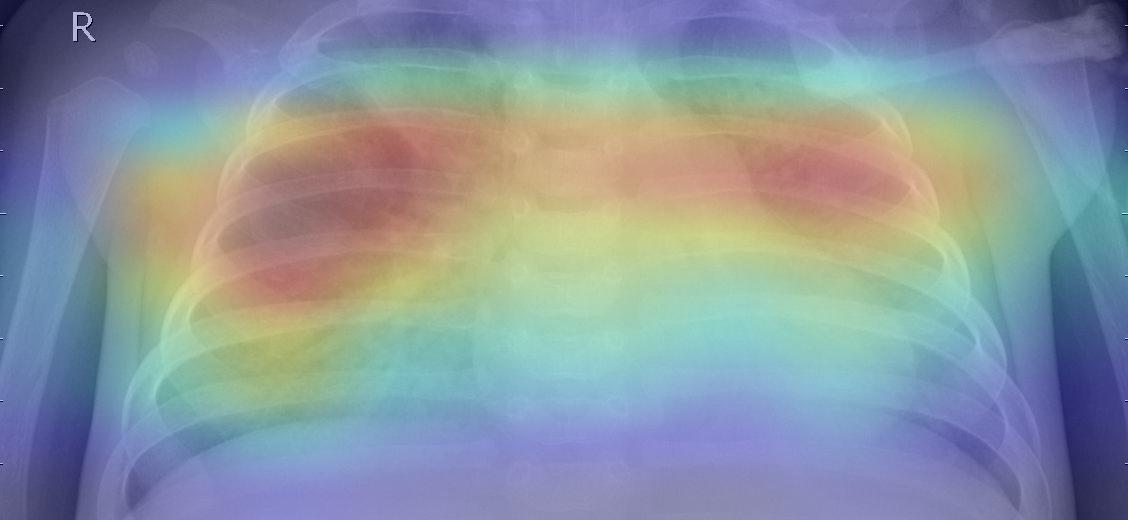

In [8]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

# New Section

### Referencias

[1] https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

[2] https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

[3] Deep Learning, principios y fundamentos. Anna Bosch Rué.

[4]. https://towardsdatascience.com/detection-of-covid-19-presence-from-chest-x-ray-scans-using-cnn-class-activation-maps-c1ab0d7c294b

[5] https://www.visualcapitalist.com/wp-content/uploads/2020/04/covid-19-affects-the-body.html

[6]https://www.lung.org/lung-health-diseases/lung-disease-lookup/pneumonia/learn-about-pneumonia

[7]https://www.quora.com/What-does-a-healthy-lung-look-like-in-an-X-ray-of-a-50-year-old

[8]https://my.clevelandclinic.org/health/diseases/4471-pneumonia


[9]http://www.scielo.mec.pt/scielo.php?script=sci_arttext&pid=S1646-98952019000400005&lng=pt&nrm=iso#:~:text=Las%20t%C3%A9cnicas%20de%20data%20augmentation,a%20la%20complejidad%20del%20modelo.

[10] https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

[11] Md. Rezaul Karim, DeepCOVIDExplainer: Explainable COVID-19 Predictions
Based on Chest X-ray Images

[12]Joseph Paul Cohen, On the limits of cross-domain generalization in automated X-ray prediction.

[13] Deep Learning, Anna Bosch Rue

[14]https://cims.nyu.edu/people/profiles/LECUN_Yann.html

[15] https://arxiv.org/abs/1409.1556

[16] https://iq.opengenus.org/vgg19-architecture/

In [0]:
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)